# Dataset source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

#### Problem Statement: Testing 123

### Identify Missing Values

In [16]:
import pandas as pd
# testing

# Load the dataset
heart_disease_df = pd.read_csv('heart_disease_uci.csv')

# Identifying missing values in each column
missing_values = heart_disease_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


### Handling Missing Values

In [10]:
# Fill missing values for numerical columns with the median
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for column in numerical_columns:
    heart_disease_df[column].fillna(heart_disease_df[column].median(), inplace=True)

# Fill missing values for categorical columns with the mode
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for column in categorical_columns:
    mode_value = heart_disease_df[column].mode()[0]
    heart_disease_df[column].fillna(mode_value, inplace=True)

### Exploratory Data Analysis (EDA)

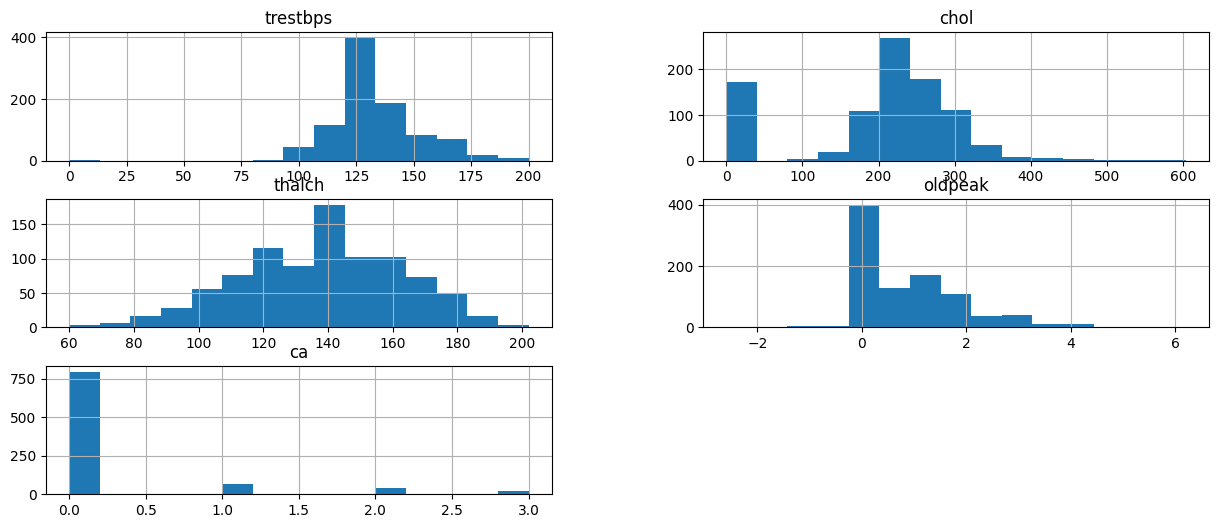

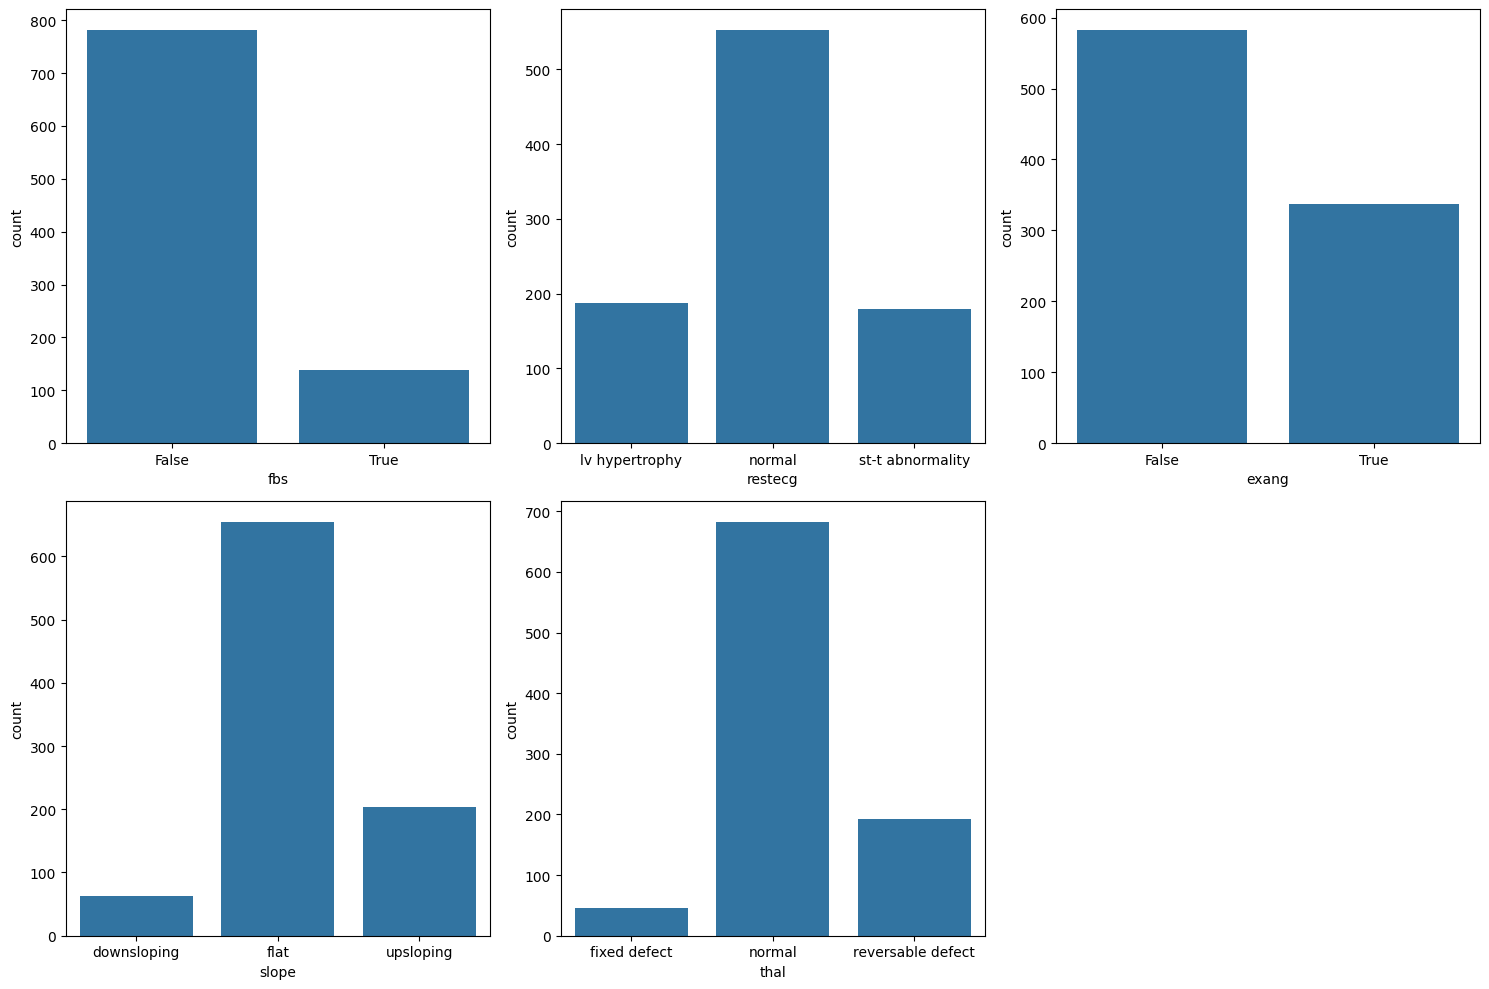

ValueError: could not convert string to float: 'Male'

<Figure size 1000x800 with 0 Axes>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numerical columns
heart_disease_df[numerical_columns].hist(bins=15, figsize=(15, 6))
plt.show()

# Count plots for categorical columns
plt.figure(figsize=(15, 10))
for index, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, index)
    sns.countplot(x=column, data=heart_disease_df)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(heart_disease_df.corr(), annot=True)
plt.show()

### Data Preparation for Modeling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Encoding categorical variables
heart_disease_encoded_df = pd.get_dummies(heart_disease_df, drop_first=True)

# Splitting the dataset
X = heart_disease_encoded_df.drop('num', axis=1)
y = heart_disease_encoded_df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building and Evaluation

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       120
           1       0.54      0.58      0.56        78
           2       0.09      0.03      0.04        34
           3       0.24      0.25      0.25        36
           4       0.00      0.00      0.00         8

    accuracy                           0.57       276
   macro avg       0.32      0.34      0.33       276
weighted avg       0.51      0.57      0.54       276



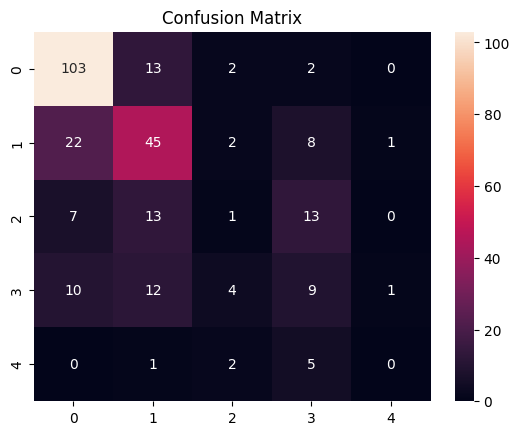

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [17]:
## testing 123